In [2]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)


import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import MaxPooling2D, AveragePooling2D, Input, Flatten ,Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from sklearn.model_selection import train_test_split
import timeit
from keras import optimizers
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline# This Python 3 environment comes with many helpful analytics libraries installed


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


UsageError: unrecognized arguments: This Python 3 environment comes with many helpful analytics libraries installed


# --load data--

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

train_data = pd.read_csv("../input/ece657a-w20-asg3-part2/train.csv")
test_data = pd.read_csv("../input/ece657a-w20-asg3-part2/testX.csv")

x = train_data.iloc[:,2:].values
y = train_data.iloc[:,1].values

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [4]:
test_data

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


In [5]:
x.shape

(60000, 784)

In [6]:
y

array([4, 0, 0, ..., 4, 0, 2])

# --Splitting into train and val set--

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x_train.shape

(48000, 784)

In [9]:
x_test.shape

(12000, 784)

In [10]:
y_train.shape

(48000,)

In [11]:
y_test.shape


(12000,)

In [12]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((48000, 784), (12000, 784), (48000,), (12000,))

In [13]:
img_size=28
num_classes=5

# 1. --Reshaping into 28*28--
# 2. --Normalize--

In [14]:
x_train = x_train.reshape(x_train.shape[0],img_size,img_size,1)
x_test = x_test.reshape(x_test.shape[0],img_size,img_size,1)
input_size = (28, 28,1)

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

x_train shape: (48000, 28, 28, 1)
x_test shape: (12000, 28, 28, 1)
48000 train samples
12000 test samples
y_train shape: (48000,)


In [15]:
x_train.shape, y_train.shape,x_test.shape,y_test.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

# --Categorical labels--

In [16]:
#Converting labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [17]:
y_train.shape

(48000, 5)

In [18]:
y_test.shape

(12000, 5)

# -------------------------------------------------------------------------------------

# MODEL 1 --> adam = Adam(lr=5e-4) i.e. 0.00050 | epoch = 80 | batch_size= 64 

In [19]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.losses import categorical_crossentropy


model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [20]:
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               307456    
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [21]:
adam = Adam(lr=5e-4) # 0.00050
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

# Time Taken 319.34







In [22]:
import timeit
start = timeit.default_timer()
a=model.fit(x_train, y_train, batch_size=64,epochs=80,verbose=1, validation_data=(x_test, y_test),shuffle=False)
stop = timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/80
48000/48000 [==============================] - 8s 161us/step - loss: 0.6365 - accuracy: 0.7336 - val_loss: 0.4474 - val_accuracy: 0.8207
Epoch 2/80
48000/48000 [==============================] - 4s 80us/step - loss: 0.4329 - accuracy: 0.8250 - val_loss: 0.4027 - val_accuracy: 0.8438
Epoch 3/80
48000/48000 [==============================] - 4s 79us/step - loss: 0.3739 - accuracy: 0.8486 - val_loss: 0.3861 - val_accuracy: 0.8437
Epoch 4/80
48000/48000 [==============================] - 4s 83us/step - loss: 0.3352 - accuracy: 0.8649 - val_loss: 0.3643 - val_accuracy: 0.8543
Epoch 5/80
48000/48000 [==============================] - 4s 79us/step - loss: 0.3090 - accuracy: 0.8758 - val_loss: 0.3560 - val_accuracy: 0.8566
Epoch 6/80
48000/48000 [==============================] - 4s 83us/step - loss: 0.2871 - accuracy: 0.8839 - val_loss: 0.3460 - val_accuracy: 0.8599
Epoch 7/80
48000/48000 [==============================] - 4s 83us/s

48000/48000 [==============================] - 4s 79us/step - loss: 0.0326 - accuracy: 0.9880 - val_loss: 0.7168 - val_accuracy: 0.8742
Epoch 57/80
48000/48000 [==============================] - 4s 81us/step - loss: 0.0328 - accuracy: 0.9875 - val_loss: 0.7271 - val_accuracy: 0.8803
Epoch 58/80
48000/48000 [==============================] - 4s 90us/step - loss: 0.0299 - accuracy: 0.9894 - val_loss: 0.7541 - val_accuracy: 0.8773
Epoch 59/80
48000/48000 [==============================] - 4s 87us/step - loss: 0.0317 - accuracy: 0.9886 - val_loss: 0.7445 - val_accuracy: 0.8742
Epoch 60/80
48000/48000 [==============================] - 4s 83us/step - loss: 0.0278 - accuracy: 0.9901 - val_loss: 0.7563 - val_accuracy: 0.8812
Epoch 61/80
48000/48000 [==============================] - 4s 82us/step - loss: 0.0256 - accuracy: 0.9904 - val_loss: 0.7841 - val_accuracy: 0.8767
Epoch 62/80
48000/48000 [==============================] - 4s 81us/step - loss: 0.0280 - accuracy: 0.9898 - val_loss: 0.8101

In [23]:
print('Time Taken',stop-start)

Time Taken 319.34197867200055


# RESULT | MODEL 1 | VAL DATA
## Epoch 80/80 | 48000/48000 | val_loss: 0.9235 - val_accuracy: 0.87.11

# PLOTS

In [24]:
a.history

{'val_loss': [0.44735182174046834,
  0.40272582745552066,
  0.38606669402122495,
  0.36434329295158385,
  0.3559534105459849,
  0.3460194578965505,
  0.34190115829308826,
  0.3470604463815689,
  0.32069798747698464,
  0.3138350951274236,
  0.3076668727795283,
  0.31792768931388854,
  0.330686199148496,
  0.3331635001897812,
  0.33515394818782807,
  0.33567524679501853,
  0.4272124010721842,
  0.3982021456559499,
  0.32876878893375394,
  0.3459819942712784,
  0.38568156854311625,
  0.4087386578718821,
  0.4550460950136185,
  0.5014835268259048,
  0.537033332824707,
  0.45031640501817066,
  0.46355537478129066,
  0.4546297384103139,
  0.5175052187442779,
  0.5155377273956935,
  0.5338626159032186,
  0.4875951380729675,
  0.5047963729699453,
  0.5337251583337784,
  0.5938832977215449,
  0.602619079152743,
  0.5933414390881856,
  0.6049581273794175,
  0.6032880753278732,
  0.6897426926692327,
  0.7484561395247777,
  0.7269346045255661,
  0.7711256346702575,
  0.6984962362448375,
  0.709382

In [25]:
print(a.history['accuracy'])
print(a.history['loss'])
print(a.history['val_accuracy'])
print(a.history['val_loss'])

[0.73358333, 0.82502085, 0.8486458, 0.8649167, 0.8757708, 0.88385415, 0.8912917, 0.89922917, 0.9053125, 0.91025, 0.9163125, 0.92116666, 0.9215, 0.91845834, 0.92733335, 0.9341458, 0.93539584, 0.9315625, 0.93691665, 0.9443125, 0.95135415, 0.954, 0.9521458, 0.9534792, 0.95966667, 0.9613125, 0.9582083, 0.962375, 0.9675625, 0.96875, 0.96947914, 0.96629167, 0.9670208, 0.9707083, 0.9734375, 0.97652084, 0.9770625, 0.9746042, 0.9694167, 0.97272915, 0.97629166, 0.98, 0.9796875, 0.98185414, 0.9817917, 0.9793125, 0.9840625, 0.9845833, 0.984375, 0.981375, 0.9785, 0.9844792, 0.987, 0.98810416, 0.9887292, 0.9879583, 0.9875417, 0.9893542, 0.9886042, 0.990125, 0.9903542, 0.98975, 0.991375, 0.9906667, 0.99116665, 0.9912292, 0.99266666, 0.99235415, 0.9923125, 0.9931458, 0.9919583, 0.993375, 0.9936042, 0.99129164, 0.9925, 0.99354166, 0.9925208, 0.99525, 0.992875, 0.99422914]
[0.6364568486611049, 0.4329486378232638, 0.37391923542817435, 0.33517335130771003, 0.3090482786297798, 0.28711915347973505, 0.270822

### Making dataframe

In [26]:
train_acc_1=a.history['accuracy']
train_loss_1=a.history['loss']
val_acc_1=a.history['val_accuracy']
val_loss_1=a.history['val_loss']

num=len(a.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [27]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80]

In [28]:
history_df1=pd.DataFrame(eplist,columns = ['Epoch'])
history_df1['train_acc']=pd.DataFrame(train_acc_1)

In [29]:
history_df1['train_loss']=pd.DataFrame(train_loss_1)
history_df1['val_acc']=pd.DataFrame(val_acc_1)
history_df1['val_loss']=pd.DataFrame(val_loss_1)

In [30]:
history_df1

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.733583,0.636457,0.820667,0.447352
1,2,0.825021,0.432949,0.843833,0.402726
2,3,0.848646,0.373919,0.843667,0.386067
3,4,0.864917,0.335173,0.854250,0.364343
4,5,0.875771,0.309048,0.856583,0.355953
...,...,...,...,...,...
75,76,0.993542,0.018283,0.861667,1.116294
76,77,0.992521,0.023220,0.873667,0.915678
77,78,0.995250,0.014143,0.867167,0.968908
78,79,0.992875,0.021639,0.874333,0.925738


### Epoch vs Train loss

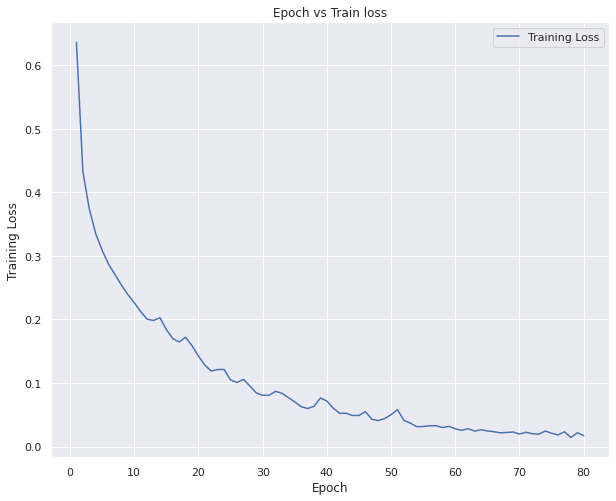

In [31]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df1)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

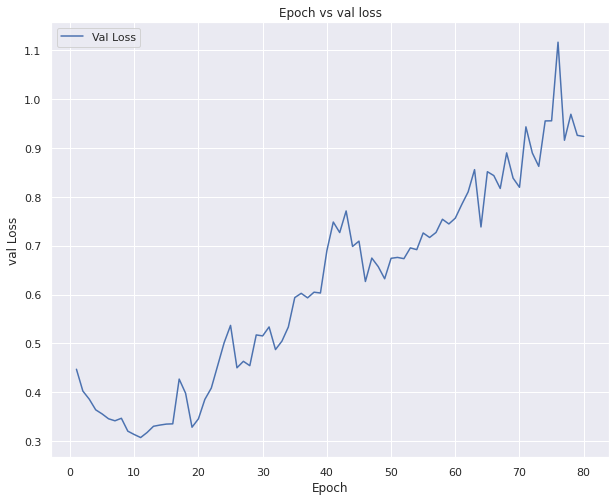

In [32]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df1)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

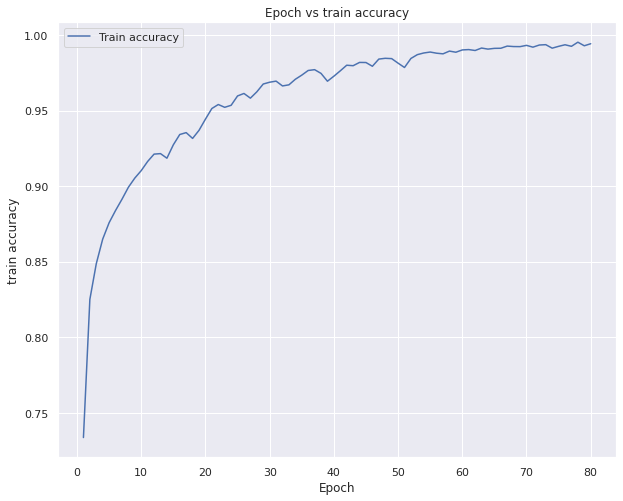

In [33]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df1)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

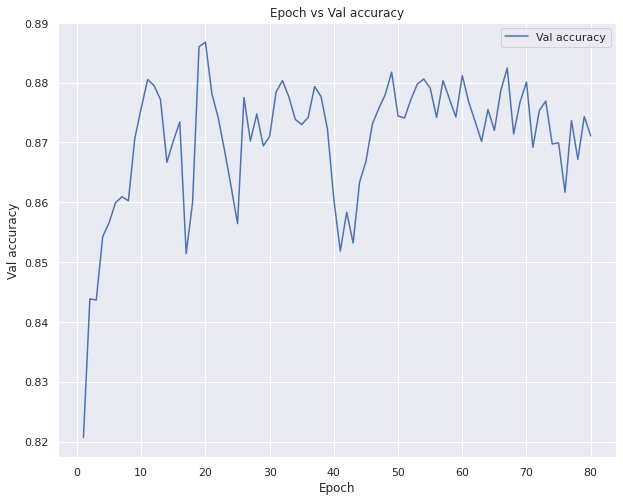

In [34]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df1)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

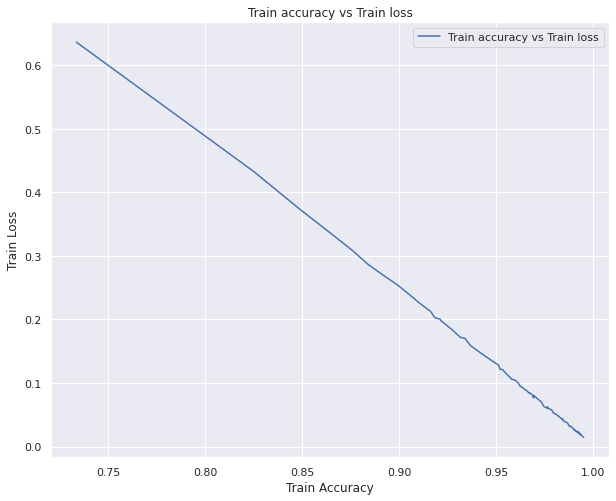

In [35]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df1)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

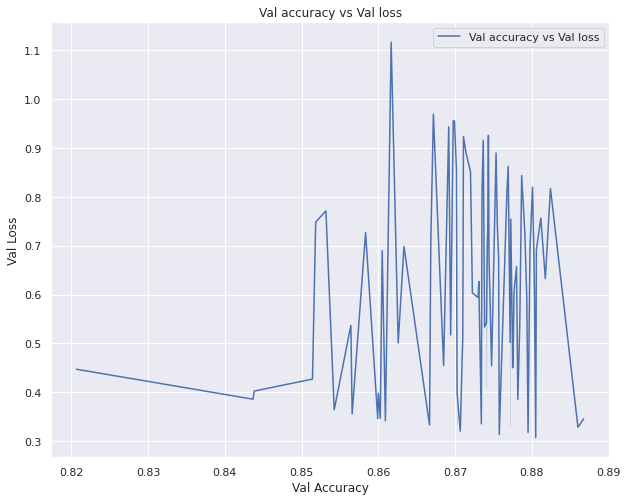

In [36]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df1)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Final data prediction

In [37]:
test_data


,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


# --Reshaping into 28*28--

In [38]:
# for test data
#Storing Pixel array in form length width and channel in df_x_test
df_x_test = test_data.iloc[:,1:].values.reshape(len(test_data),28,28,1)

In [39]:
df_x_test.shape

(10000, 28, 28, 1)

In [40]:
df_x_test

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


# --Normalizing--

In [41]:
df_x_test=df_x_test.astype('float32')
#rescaling it between 0 to 1
df_x_test /=255


In [42]:
target_classes1 = model.predict(df_x_test,verbose=1)

10000/10000 [==============================] - 0s 43us/step


In [43]:
target_classes1

array([[6.49085986e-23, 8.04575937e-12, 1.02553611e-06, 9.99992013e-01,
        6.89653598e-06],
       [0.00000000e+00, 1.08819495e-26, 1.48117230e-22, 9.56769100e-08,
        9.99999881e-01],
       [8.73193204e-01, 1.26806810e-01, 7.15969595e-09, 3.22368492e-19,
        5.01065120e-25],
       ...,
       [1.99546052e-18, 1.53339474e-09, 1.55342219e-04, 9.37301457e-01,
        6.25431836e-02],
       [1.52799529e-07, 4.43821773e-02, 9.55617666e-01, 5.61844523e-18,
        1.57228384e-19],
       [3.32861655e-10, 3.32178129e-09, 9.99951839e-01, 4.81862953e-05,
        1.41276002e-13]], dtype=float32)

In [44]:
target_classes1=np.argmax(target_classes1,axis=1)

In [45]:
target_classes1

array([3, 4, 0, ..., 3, 2, 2])

In [46]:
target_classes2 = model.predict_classes(df_x_test,verbose=1)
target_classes2

10000/10000 [==============================] - 0s 41us/step


array([3, 4, 0, ..., 3, 2, 2])

In [47]:
target_classes2=pd.DataFrame(target_classes2)

In [48]:
target_classes2=pd.DataFrame.reset_index(target_classes2)
target_classes2.columns=['Id','Label']

In [49]:
target_classes2

,Id,Label
0,0,3
1,1,4
2,2,0
3,3,1
4,4,3
...,...,...
9995,9995,1
9996,9996,1
9997,9997,3
9998,9998,2


In [50]:
filename = 'submission_lenet5.csv'
target_classes2.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_lenet5.csv


# Model 2 | adam = Adam(0.01) | epoch = 80 | batch_size= 64

In [51]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [52]:
model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               307456    
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

In [53]:
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

# --Fitting the model--

In [54]:
import timeit
start = timeit.default_timer()
b=model.fit(x_train, y_train, batch_size=64,epochs=80,verbose=1, validation_data=(x_test, y_test),shuffle=False)
stop = timeit.default_timer()

Train on 48000 samples, validate on 12000 samples
Epoch 1/80
48000/48000 [==============================] - 4s 88us/step - loss: 0.6014 - accuracy: 0.7468 - val_loss: 0.4368 - val_accuracy: 0.8213
Epoch 2/80
48000/48000 [==============================] - 4s 82us/step - loss: 0.4382 - accuracy: 0.8208 - val_loss: 0.4506 - val_accuracy: 0.8188
Epoch 3/80
48000/48000 [==============================] - 4s 88us/step - loss: 0.3979 - accuracy: 0.8364 - val_loss: 0.3988 - val_accuracy: 0.8413
Epoch 4/80
48000/48000 [==============================] - 4s 82us/step - loss: 0.3832 - accuracy: 0.8428 - val_loss: 0.3981 - val_accuracy: 0.8416
Epoch 5/80
48000/48000 [==============================] - 4s 82us/step - loss: 0.3735 - accuracy: 0.8482 - val_loss: 0.4165 - val_accuracy: 0.8301
Epoch 6/80
48000/48000 [==============================] - 4s 84us/step - loss: 0.3563 - accuracy: 0.8547 - val_loss: 0.5177 - val_accuracy: 0.7876
Epoch 7/80
48000/48000 [==============================] - 4s 88us/st

48000/48000 [==============================] - 4s 80us/step - loss: 0.2792 - accuracy: 0.8937 - val_loss: 0.5056 - val_accuracy: 0.8521
Epoch 57/80
48000/48000 [==============================] - 4s 81us/step - loss: 0.2452 - accuracy: 0.9057 - val_loss: 0.5214 - val_accuracy: 0.8587
Epoch 58/80
48000/48000 [==============================] - 4s 83us/step - loss: 0.2409 - accuracy: 0.9079 - val_loss: 0.5489 - val_accuracy: 0.8434
Epoch 59/80
48000/48000 [==============================] - 4s 80us/step - loss: 0.2799 - accuracy: 0.8965 - val_loss: 0.5347 - val_accuracy: 0.8478
Epoch 60/80
48000/48000 [==============================] - 4s 81us/step - loss: 0.2629 - accuracy: 0.9021 - val_loss: 0.5812 - val_accuracy: 0.8576
Epoch 61/80
48000/48000 [==============================] - 4s 83us/step - loss: 0.2514 - accuracy: 0.9058 - val_loss: 0.6284 - val_accuracy: 0.8508
Epoch 62/80
48000/48000 [==============================] - 4s 85us/step - loss: 0.3027 - accuracy: 0.8879 - val_loss: 0.5493

In [55]:
print('Time Taken',stop-start)

Time Taken 323.2294229859981


# Time Taken 323.2294229859981

# RESULT | MODEL 2 | VAL DATA
## Epoch 80/80 | 48000/48000 | val_loss:  0.7129 - val_accuracy: 0.8464

# PLOTS

In [56]:
b.history

{'val_loss': [0.43681134645144143,
  0.45056003284454343,
  0.3987717499732971,
  0.3981026867230733,
  0.4165335652033488,
  0.517716476281484,
  0.3957743661403656,
  0.4731329681078593,
  0.3829773608048757,
  0.38224634250005085,
  0.37692405899365744,
  0.3933165136973063,
  0.40225735545158386,
  0.395809707403183,
  0.4106995216210683,
  0.42582403945922853,
  0.4223772234916687,
  0.480424103975296,
  0.4360720230738322,
  0.41724289512634277,
  0.42364864667256674,
  0.44528726836045585,
  0.47726334261894227,
  0.49082058215141294,
  0.45059872273604074,
  0.46044577491283417,
  0.5803012788295746,
  0.46589952929814654,
  0.4874255116780599,
  0.4469694950183233,
  0.5695899266401927,
  0.463841955502828,
  0.4648708593050639,
  0.47919686754544577,
  0.5408537652492523,
  0.45279495751857757,
  0.5070732626120249,
  0.4659153295358022,
  0.6783662116527558,
  0.5086677628358205,
  0.5757236256599426,
  0.5463545817534129,
  0.4749574104944865,
  0.7133641652266185,
  0.5212

In [57]:
print(b.history['accuracy'])
print(b.history['loss'])
print(b.history['val_accuracy'])
print(b.history['val_loss'])

[0.7468125, 0.82079166, 0.8363542, 0.8427708, 0.8481875, 0.85466665, 0.85647917, 0.8591458, 0.8625, 0.86516666, 0.867, 0.8690208, 0.87166667, 0.8724167, 0.87408334, 0.8757708, 0.8741875, 0.8790208, 0.87795836, 0.8816042, 0.87972915, 0.881, 0.87320834, 0.8801875, 0.8817083, 0.88252085, 0.876375, 0.884875, 0.8794375, 0.8796667, 0.8835833, 0.8763958, 0.8884583, 0.88560414, 0.8912708, 0.89635414, 0.8899792, 0.8901042, 0.8863958, 0.88983333, 0.89166665, 0.8975833, 0.8864167, 0.89125, 0.893, 0.89797914, 0.8974375, 0.8877083, 0.8975, 0.8989375, 0.8993125, 0.89270836, 0.8904167, 0.8863958, 0.8987917, 0.89370835, 0.9056875, 0.907875, 0.8965, 0.90214586, 0.9058333, 0.88785416, 0.90891665, 0.901625, 0.90966666, 0.904625, 0.90208334, 0.89883333, 0.90110415, 0.9021875, 0.9034167, 0.901375, 0.89458334, 0.9041875, 0.90785414, 0.9026458, 0.90920836, 0.90520835, 0.9104583, 0.8785625]
[0.6013754415512085, 0.438226079026858, 0.3978766576846441, 0.38320421864589055, 0.37348576134443284, 0.3563453405102094

### Making dataframe

In [58]:
train_acc_1=b.history['accuracy']
train_loss_1=b.history['loss']
val_acc_1=b.history['val_accuracy']
val_loss_1=b.history['val_loss']

num=len(b.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [59]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80]

In [60]:
history_df2=pd.DataFrame(eplist,columns = ['Epoch'])
history_df2['train_acc']=pd.DataFrame(train_acc_1)

In [61]:
history_df2['train_loss']=pd.DataFrame(train_loss_1)
history_df2['val_acc']=pd.DataFrame(val_acc_1)
history_df2['val_loss']=pd.DataFrame(val_loss_1)

In [62]:
history_df2

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.746813,0.601375,0.821333,0.436811
1,2,0.820792,0.438226,0.818833,0.450560
2,3,0.836354,0.397877,0.841333,0.398772
3,4,0.842771,0.383204,0.841583,0.398103
4,5,0.848188,0.373486,0.830083,0.416534
...,...,...,...,...,...
75,76,0.902646,0.261732,0.853667,0.691264
76,77,0.909208,0.242554,0.852917,0.725591
77,78,0.905208,0.262016,0.852250,0.788093
78,79,0.910458,0.235404,0.827333,0.954866


### Epoch vs Train loss

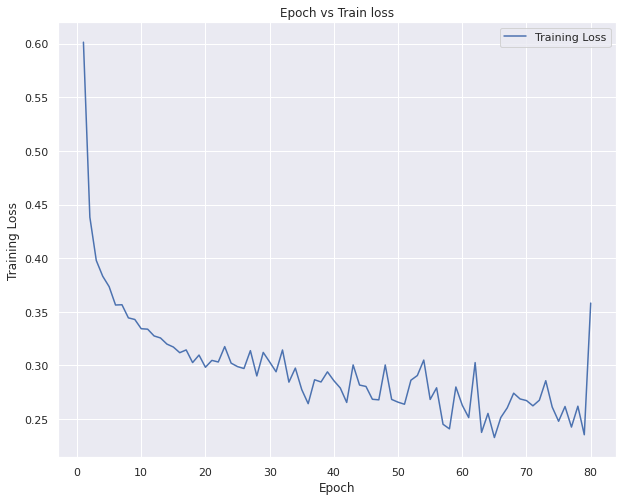

In [63]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df2)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

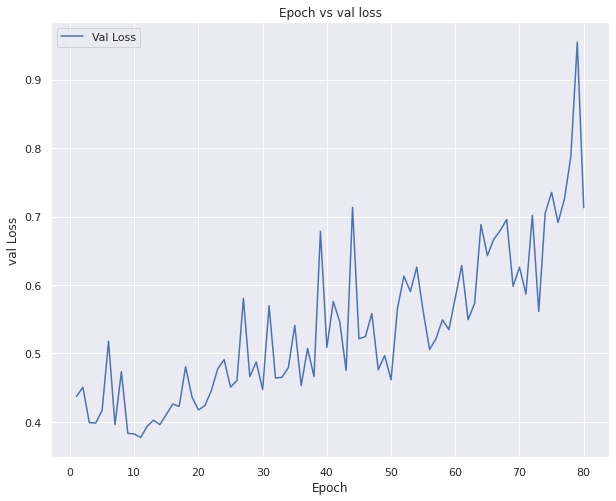

In [64]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df2)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

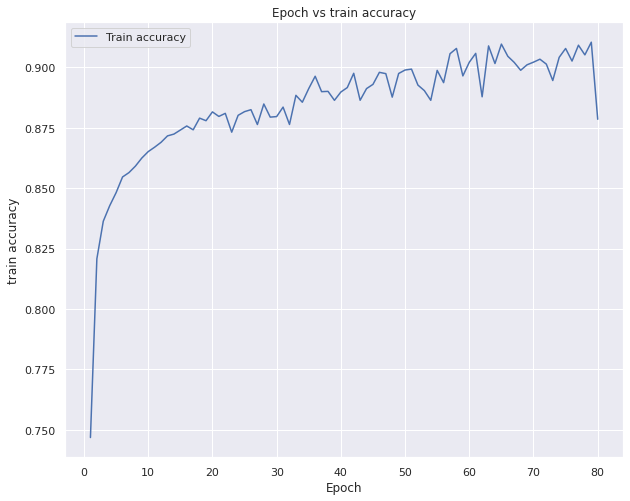

In [65]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df2)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

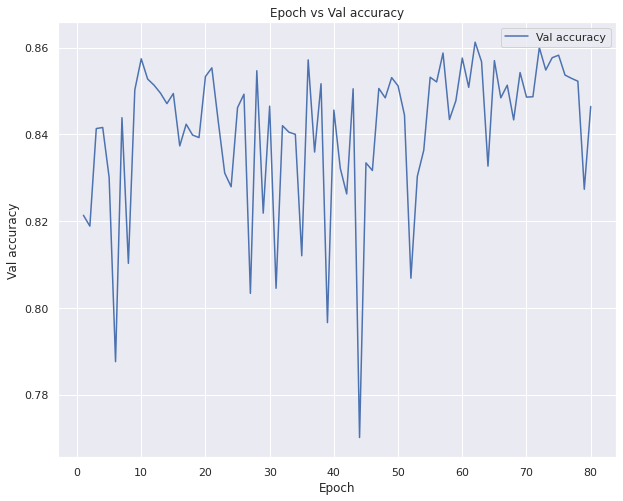

In [66]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df2)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

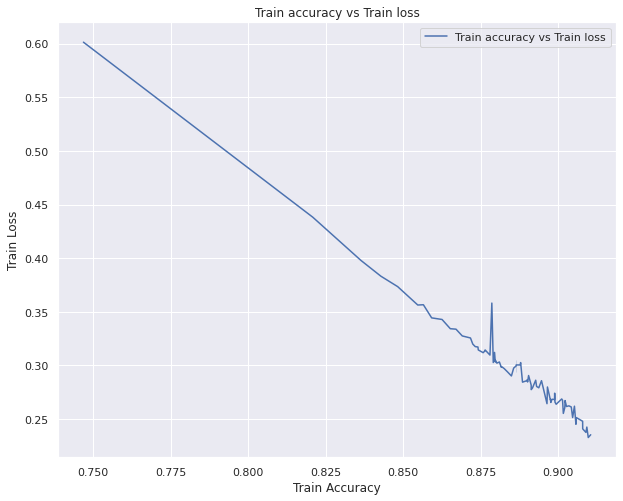

In [67]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df2)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

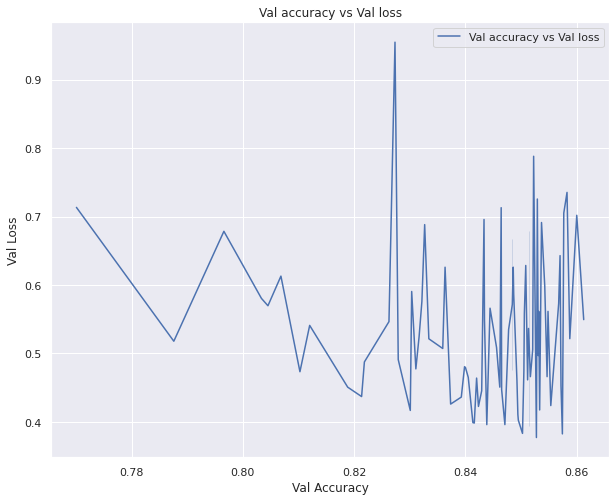

In [68]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df2)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Final data prediction

In [69]:
test_data


,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


# --Reshaping the real test data into 28*28--

In [70]:
# for test data
#Storing Pixel array in form length width and channel in df_x_test
df_x_test = test_data.iloc[:,1:].values.reshape(len(test_data),28,28,1)

In [71]:
df_x_test.shape

(10000, 28, 28, 1)

In [72]:
df_x_test

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


# --Normalizing the real test data--

In [73]:
df_x_test=df_x_test.astype('float32')
#rescaling it between 0 to 1
df_x_test /=255


In [74]:
target_classes3 = model.predict_classes(df_x_test,verbose=1)
target_classes3

10000/10000 [==============================] - 0s 42us/step


array([3, 4, 0, ..., 3, 2, 2])

In [75]:
target_classes3=pd.DataFrame(target_classes3)

In [76]:
target_classes3=pd.DataFrame.reset_index(target_classes3)
target_classes3.columns=['Id','Label']

In [77]:
# target_classes3

In [78]:
filename = 'submission_lenet5_1.csv'
target_classes3.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_lenet5_1.csv


# Model 3 | adam = Adam(0.001)| epoch = 150 | batch_size= 32

In [79]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [80]:
model.build()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               307456    
_________________________________________________________________
dense_8 (Dense)              (None, 84)               

In [81]:
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

# --Fitting the model--

In [82]:
import timeit
start = timeit.default_timer()
c=model.fit(x_train, y_train, batch_size=32,epochs=150,verbose=1, validation_data=(x_test, y_test),shuffle=False)
stop = timeit.default_timer()

# model.fit(x_train,y_train,batch_size = 64,epochs = 100,verbose=1,validation_data=(x_test,y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/150
48000/48000 [==============================] - 8s 172us/step - loss: 0.5470 - accuracy: 0.7707 - val_loss: 0.3998 - val_accuracy: 0.8369
Epoch 2/150
48000/48000 [==============================] - 7s 153us/step - loss: 0.3761 - accuracy: 0.8460 - val_loss: 0.3267 - val_accuracy: 0.8660
Epoch 3/150
48000/48000 [==============================] - 7s 149us/step - loss: 0.3224 - accuracy: 0.8687 - val_loss: 0.3175 - val_accuracy: 0.8708
Epoch 4/150
48000/48000 [==============================] - 7s 150us/step - loss: 0.2882 - accuracy: 0.8828 - val_loss: 0.3260 - val_accuracy: 0.8667
Epoch 5/150
48000/48000 [==============================] - 7s 148us/step - loss: 0.2585 - accuracy: 0.8967 - val_loss: 0.3497 - val_accuracy: 0.8566
Epoch 6/150
48000/48000 [==============================] - 7s 147us/step - loss: 0.2373 - accuracy: 0.9047 - val_loss: 0.3609 - val_accuracy: 0.8555
Epoch 7/150
48000/48000 [==============================]

48000/48000 [==============================] - 7s 154us/step - loss: 0.0326 - accuracy: 0.9880 - val_loss: 0.8809 - val_accuracy: 0.8720
Epoch 56/150
48000/48000 [==============================] - 7s 147us/step - loss: 0.0289 - accuracy: 0.9897 - val_loss: 0.9579 - val_accuracy: 0.8598
Epoch 57/150
48000/48000 [==============================] - 7s 152us/step - loss: 0.0346 - accuracy: 0.9884 - val_loss: 0.8811 - val_accuracy: 0.8702
Epoch 58/150
48000/48000 [==============================] - 8s 163us/step - loss: 0.0297 - accuracy: 0.9901 - val_loss: 0.8521 - val_accuracy: 0.8722
Epoch 59/150
48000/48000 [==============================] - 8s 157us/step - loss: 0.0320 - accuracy: 0.9894 - val_loss: 0.8770 - val_accuracy: 0.8717
Epoch 60/150
48000/48000 [==============================] - 7s 150us/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 1.0560 - val_accuracy: 0.8636
Epoch 61/150
48000/48000 [==============================] - 7s 152us/step - loss: 0.0274 - accuracy: 0.9905 - val

48000/48000 [==============================] - 7s 151us/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 1.2285 - val_accuracy: 0.8711
Epoch 110/150
48000/48000 [==============================] - 7s 150us/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 1.1537 - val_accuracy: 0.8733
Epoch 111/150
48000/48000 [==============================] - 7s 149us/step - loss: 0.0190 - accuracy: 0.9945 - val_loss: 1.2089 - val_accuracy: 0.8683
Epoch 112/150
48000/48000 [==============================] - 7s 151us/step - loss: 0.0166 - accuracy: 0.9948 - val_loss: 1.1480 - val_accuracy: 0.8729
Epoch 113/150
48000/48000 [==============================] - 7s 145us/step - loss: 0.0185 - accuracy: 0.9944 - val_loss: 1.2587 - val_accuracy: 0.8705
Epoch 114/150
48000/48000 [==============================] - 7s 150us/step - loss: 0.0164 - accuracy: 0.9952 - val_loss: 1.1527 - val_accuracy: 0.8650
Epoch 115/150
48000/48000 [==============================] - 7s 151us/step - loss: 0.0226 - accuracy: 0.9939

In [83]:
print('Time Taken',stop-start)

Time Taken 1098.0633210080014


# Time Taken 1098.0633210080014













In [84]:
score1 = model.evaluate(x_test, y_test, batch_size=32)

12000/12000 [==============================] - 1s 60us/step


In [85]:
score1

[1.340672501181485, 0.872083306312561]

# RESULT | MODEL 3 | VAL DATA
## Epoch 150/150 | val_loss: 1.34 | val_accuracy: 0.8721

# PLOTS

In [86]:
c.history

{'val_loss': [0.3997904374798139,
  0.3267479280034701,
  0.3174825982451439,
  0.3259971181352933,
  0.34968859485785164,
  0.36085556421677273,
  0.3516435483495394,
  0.34231807906428974,
  0.35650950624545413,
  0.39478842802842457,
  0.534695025185744,
  0.5204641333520412,
  0.4993063096503417,
  0.5336637679090103,
  0.5088179470002652,
  0.49341688871135314,
  0.5658173906405767,
  0.575682803084453,
  0.5140257222900788,
  0.5475965447872877,
  0.5453164326325058,
  0.5415908753474553,
  0.541394239919881,
  0.578507791981101,
  0.6913035095681747,
  0.6064392785727978,
  0.7500468872189522,
  0.638804124896725,
  0.7782137239724398,
  0.6785264135201772,
  0.8506860630313555,
  0.6950749805582066,
  0.6760653704255819,
  0.7155418999865651,
  0.690616547580498,
  0.6628004738936821,
  0.7270878471980492,
  0.7196357092242688,
  0.7422432884592562,
  0.8997426020797187,
  0.7674121581354799,
  0.8124490267609557,
  0.740269337909917,
  0.7620009851045907,
  0.7502248736967643,

In [87]:
print(c.history['accuracy'])
print(c.history['loss'])
print(c.history['val_accuracy'])
print(c.history['val_loss'])

[0.77075, 0.84597915, 0.86875, 0.88277084, 0.8966875, 0.90475, 0.91, 0.91408336, 0.9204375, 0.92908335, 0.93383336, 0.93839586, 0.94383335, 0.94447917, 0.94885415, 0.95164585, 0.9546667, 0.9575833, 0.9606042, 0.9620208, 0.964875, 0.9675, 0.9685, 0.9685, 0.9729583, 0.9720625, 0.97172916, 0.9701458, 0.97289586, 0.9739375, 0.9779375, 0.97727084, 0.9804375, 0.9805, 0.9814375, 0.98141664, 0.981375, 0.98010415, 0.98279166, 0.9837083, 0.982875, 0.984125, 0.9835, 0.9862083, 0.98495835, 0.986625, 0.9866875, 0.98639584, 0.98747915, 0.9879583, 0.98758334, 0.9873125, 0.9887292, 0.9883125, 0.98802084, 0.9896875, 0.988375, 0.99008334, 0.98941666, 0.99058336, 0.9904583, 0.99139583, 0.98920834, 0.9915208, 0.99010414, 0.9902083, 0.9918542, 0.99116665, 0.9919792, 0.992, 0.9909375, 0.9909792, 0.9915625, 0.9908958, 0.9912083, 0.99216664, 0.9934375, 0.99225, 0.991875, 0.9921875, 0.992625, 0.99375, 0.992, 0.99175, 0.9929583, 0.9933125, 0.9936042, 0.9925625, 0.99333334, 0.992625, 0.9944792, 0.99352086, 0.993

### Making dataframe

In [88]:
train_acc_1=c.history['accuracy']
train_loss_1=c.history['loss']
val_acc_1=c.history['val_accuracy']
val_loss_1=c.history['val_loss']

num=len(c.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [89]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150]

In [90]:
history_df3=pd.DataFrame(eplist,columns = ['Epoch'])
history_df3['train_acc']=pd.DataFrame(train_acc_1)

In [91]:
history_df3['train_loss']=pd.DataFrame(train_loss_1)
history_df3['val_acc']=pd.DataFrame(val_acc_1)
history_df3['val_loss']=pd.DataFrame(val_loss_1)

In [92]:
history_df3

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.770750,0.546951,0.836917,0.399790
1,2,0.845979,0.376081,0.866000,0.326748
2,3,0.868750,0.322416,0.870750,0.317483
3,4,0.882771,0.288234,0.866667,0.325997
4,5,0.896688,0.258488,0.856583,0.349689
...,...,...,...,...,...
145,146,0.995458,0.018169,0.869333,1.373717
146,147,0.996312,0.012939,0.871917,1.388561
147,148,0.994250,0.020925,0.869417,1.406076
148,149,0.995979,0.014859,0.868167,1.457813


### Epoch vs Train loss

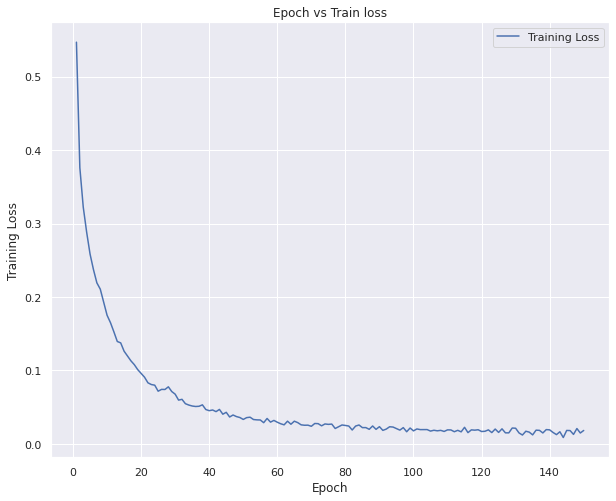

In [93]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df3)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

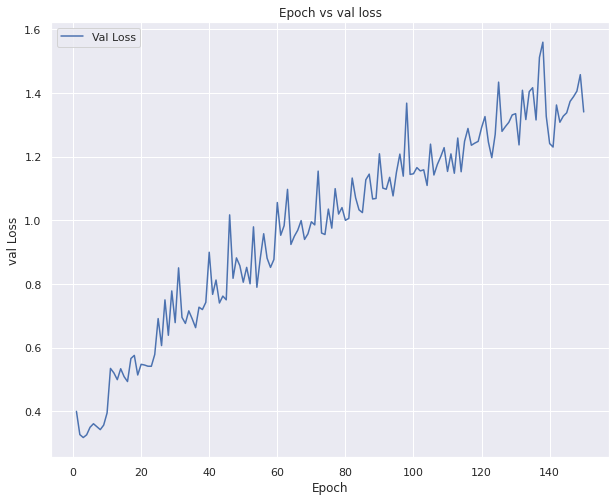

In [94]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df3)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

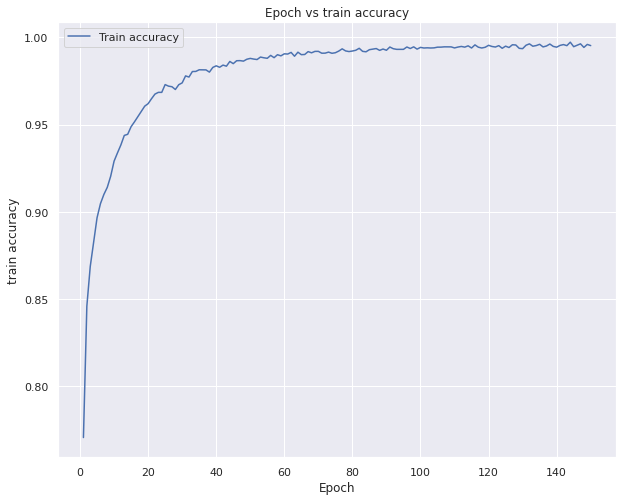

In [95]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df3)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

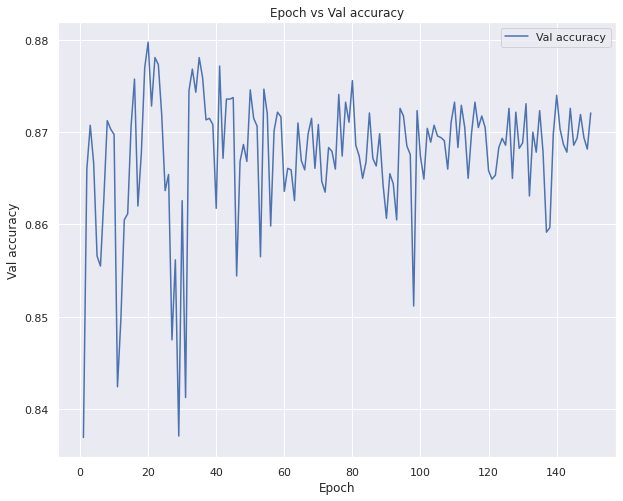

In [96]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df3)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

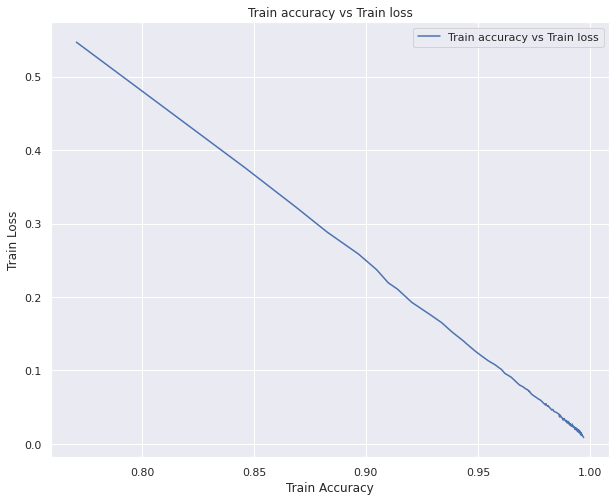

In [97]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df3)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

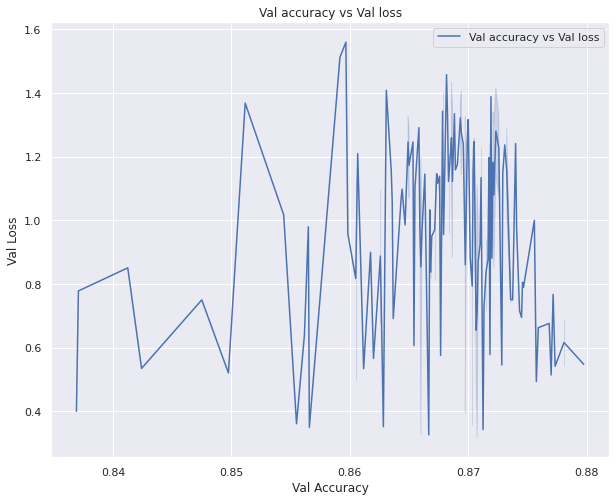

In [98]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df3)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Final data prediction

In [99]:
test_data


,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


# --Reshaping the final test data into 28*28--

In [100]:
# for test data
#Storing Pixel array in form length width and channel in df_x_test
df_x_test = test_data.iloc[:,1:].values.reshape(len(test_data),28,28,1)

In [101]:
df_x_test.shape

(10000, 28, 28, 1)

In [102]:
df_x_test

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


# -- Normalizing the final test data-- 

In [103]:
df_x_test=df_x_test.astype('float32')
#rescaling it between 0 to 1
df_x_test /=255


In [104]:
target_classes3 = model.predict_classes(df_x_test,verbose=1)
target_classes3

10000/10000 [==============================] - 0s 41us/step


array([4, 4, 1, ..., 3, 2, 2])

In [105]:
target_classes3=pd.DataFrame(target_classes3)

In [106]:
target_classes3=pd.DataFrame.reset_index(target_classes3)
target_classes3.columns=['Id','Label']

In [107]:
target_classes3

,Id,Label
0,0,4
1,1,4
2,2,1
3,3,1
4,4,0
...,...,...
9995,9995,1
9996,9996,1
9997,9997,3
9998,9998,2


In [108]:
filename = 'submission_lenet5_2.csv'
target_classes3.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_lenet5_2.csv


# Changing optimizer to sgd

# Model 4 | SGD i.e. 0.0001 | epoch = 200 | batch_size= 32

In [109]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.losses import categorical_crossentropy
from keras import optimizers

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [110]:
model.build()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               307456    
_________________________________________________________________
dense_11 (Dense)             (None, 84)               

In [111]:
sgd = optimizers.SGD(lr=0.0001) 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

# --Fitting the model--

In [112]:
import timeit
start = timeit.default_timer()
d=model.fit(x_train, y_train, batch_size=32,epochs=200,verbose=1, validation_data=(x_test, y_test),shuffle=False)
stop = timeit.default_timer()

# model.fit(x_train,y_train,batch_size = 64,epochs = 100,verbose=1,validation_data=(x_test,y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 6s 129us/step - loss: 1.5916 - accuracy: 0.2948 - val_loss: 1.5809 - val_accuracy: 0.2982
Epoch 2/200
48000/48000 [==============================] - 6s 121us/step - loss: 1.5724 - accuracy: 0.3010 - val_loss: 1.5635 - val_accuracy: 0.3052
Epoch 3/200
48000/48000 [==============================] - 6s 122us/step - loss: 1.5551 - accuracy: 0.3096 - val_loss: 1.5454 - val_accuracy: 0.3217
Epoch 4/200
48000/48000 [==============================] - 6s 122us/step - loss: 1.5358 - accuracy: 0.3379 - val_loss: 1.5242 - val_accuracy: 0.3638
Epoch 5/200
48000/48000 [==============================] - 6s 119us/step - loss: 1.5129 - accuracy: 0.3817 - val_loss: 1.4988 - val_accuracy: 0.3971
Epoch 6/200
48000/48000 [==============================] - 6s 128us/step - loss: 1.4852 - accuracy: 0.4025 - val_loss: 1.4681 - val_accuracy: 0.4153
Epoch 7/200
48000/48000 [==============================]

48000/48000 [==============================] - 6s 119us/step - loss: 0.6283 - accuracy: 0.7527 - val_loss: 0.6255 - val_accuracy: 0.7499
Epoch 56/200
48000/48000 [==============================] - 6s 122us/step - loss: 0.6243 - accuracy: 0.7545 - val_loss: 0.6215 - val_accuracy: 0.7527
Epoch 57/200
48000/48000 [==============================] - 6s 134us/step - loss: 0.6204 - accuracy: 0.7562 - val_loss: 0.6177 - val_accuracy: 0.7539
Epoch 58/200
48000/48000 [==============================] - 6s 134us/step - loss: 0.6166 - accuracy: 0.7578 - val_loss: 0.6138 - val_accuracy: 0.7562
Epoch 59/200
48000/48000 [==============================] - 6s 122us/step - loss: 0.6128 - accuracy: 0.7595 - val_loss: 0.6101 - val_accuracy: 0.7583
Epoch 60/200
48000/48000 [==============================] - 6s 123us/step - loss: 0.6091 - accuracy: 0.7614 - val_loss: 0.6063 - val_accuracy: 0.7600
Epoch 61/200
48000/48000 [==============================] - 6s 121us/step - loss: 0.6054 - accuracy: 0.7631 - val

48000/48000 [==============================] - 6s 126us/step - loss: 0.4832 - accuracy: 0.8146 - val_loss: 0.4820 - val_accuracy: 0.8123
Epoch 110/200
48000/48000 [==============================] - 6s 119us/step - loss: 0.4816 - accuracy: 0.8150 - val_loss: 0.4804 - val_accuracy: 0.8128
Epoch 111/200
48000/48000 [==============================] - 6s 121us/step - loss: 0.4800 - accuracy: 0.8155 - val_loss: 0.4789 - val_accuracy: 0.8138
Epoch 112/200
48000/48000 [==============================] - 6s 119us/step - loss: 0.4785 - accuracy: 0.8162 - val_loss: 0.4772 - val_accuracy: 0.8141
Epoch 113/200
48000/48000 [==============================] - 6s 125us/step - loss: 0.4769 - accuracy: 0.8171 - val_loss: 0.4757 - val_accuracy: 0.8152
Epoch 114/200
48000/48000 [==============================] - 6s 121us/step - loss: 0.4754 - accuracy: 0.8178 - val_loss: 0.4742 - val_accuracy: 0.8154
Epoch 115/200
48000/48000 [==============================] - 6s 122us/step - loss: 0.4739 - accuracy: 0.8184

48000/48000 [==============================] - 6s 121us/step - loss: 0.4167 - accuracy: 0.8418 - val_loss: 0.4179 - val_accuracy: 0.8393
Epoch 164/200
48000/48000 [==============================] - 6s 122us/step - loss: 0.4158 - accuracy: 0.8421 - val_loss: 0.4170 - val_accuracy: 0.8394
Epoch 165/200
48000/48000 [==============================] - 6s 124us/step - loss: 0.4148 - accuracy: 0.8424 - val_loss: 0.4161 - val_accuracy: 0.8396
Epoch 166/200
48000/48000 [==============================] - 6s 118us/step - loss: 0.4139 - accuracy: 0.8430 - val_loss: 0.4153 - val_accuracy: 0.8401
Epoch 167/200
48000/48000 [==============================] - 6s 124us/step - loss: 0.4130 - accuracy: 0.8433 - val_loss: 0.4146 - val_accuracy: 0.8401
Epoch 168/200
48000/48000 [==============================] - 6s 130us/step - loss: 0.4121 - accuracy: 0.8436 - val_loss: 0.4137 - val_accuracy: 0.8407
Epoch 169/200
48000/48000 [==============================] - 6s 134us/step - loss: 0.4112 - accuracy: 0.8442

In [113]:
print('Time Taken',stop-start)

Time Taken 1193.4481554810009


# Time Taken 1193.4481554810009






In [114]:
score = model.evaluate(x_test, y_test, batch_size=32)

12000/12000 [==============================] - 1s 64us/step


In [115]:
score

[0.38984580751260123, 0.8498333096504211]

# RESULT | MODEL 4 | VAL DATA
## Epoch 200/200 | val_loss: 0.3898 | val_accuracy: 0.8498

# PLOTS

In [116]:
d.history

{'val_loss': [1.5808878993988038,
  1.5634991442362467,
  1.5453859106699626,
  1.5242074619928996,
  1.4988118975957234,
  1.4680636129379272,
  1.430769048055013,
  1.3860422649383546,
  1.3357914724349975,
  1.2837804327011109,
  1.232725754737854,
  1.1854532130559285,
  1.1430196210543315,
  1.1042784638404846,
  1.0659362104733785,
  1.0313048849105835,
  0.9999519982337952,
  0.9698634085655212,
  0.9413830879529317,
  0.9146611258188884,
  0.8898960428237915,
  0.867154398282369,
  0.8471358407338461,
  0.8295753846168518,
  0.8136181863149007,
  0.7997823714415232,
  0.7876360630989074,
  0.7769400618076324,
  0.7673719977537791,
  0.758458460966746,
  0.7498837395509084,
  0.741916583776474,
  0.7345461740493774,
  0.7276741761366526,
  0.7211927174727122,
  0.7149805202484131,
  0.7090536518096924,
  0.7033653141657511,
  0.6978686625957489,
  0.6925001454353332,
  0.6873393411636353,
  0.682358783642451,
  0.6773661485513052,
  0.672558316151301,
  0.6679240274429321,
  0.6

In [117]:
print(d.history['accuracy'])
print(d.history['loss'])
print(d.history['val_accuracy'])
print(d.history['val_loss'])

[0.2948125, 0.30102083, 0.30964583, 0.3379375, 0.3816875, 0.40245834, 0.42525, 0.4499375, 0.46725, 0.4793125, 0.49220833, 0.50529164, 0.5207083, 0.5334167, 0.5466875, 0.5598125, 0.57195836, 0.5830625, 0.5935, 0.6021042, 0.6109375, 0.61925, 0.62691665, 0.63408333, 0.6418125, 0.6483333, 0.655125, 0.66170835, 0.66685414, 0.6719792, 0.6772708, 0.6823125, 0.68635416, 0.69027084, 0.69452083, 0.6987917, 0.70310414, 0.7066042, 0.7099792, 0.71339583, 0.716625, 0.7201875, 0.723125, 0.72575, 0.7282708, 0.7315417, 0.73425, 0.7367708, 0.73952085, 0.7416458, 0.7440417, 0.74629164, 0.7479375, 0.7506667, 0.75266665, 0.7544583, 0.75620836, 0.75783336, 0.7595, 0.7613958, 0.7631458, 0.764625, 0.765625, 0.76697916, 0.7679167, 0.7695625, 0.77110416, 0.7723542, 0.77383333, 0.7755, 0.77677083, 0.77775, 0.7791042, 0.7801667, 0.7814375, 0.78285414, 0.7844167, 0.7854375, 0.78702086, 0.78804165, 0.7889792, 0.79008335, 0.7911875, 0.7926875, 0.7934167, 0.7943125, 0.7955, 0.7969375, 0.7978333, 0.7986875, 0.79977083

### Making dataframe

In [118]:
train_acc_1=d.history['accuracy']
train_loss_1=d.history['loss']
val_acc_1=d.history['val_accuracy']
val_loss_1=d.history['val_loss']

num=len(d.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

In [119]:
eplist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [120]:
history_df4=pd.DataFrame(eplist,columns = ['Epoch'])
history_df4['train_acc']=pd.DataFrame(train_acc_1)

In [121]:
history_df4['train_loss']=pd.DataFrame(train_loss_1)
history_df4['val_acc']=pd.DataFrame(val_acc_1)
history_df4['val_loss']=pd.DataFrame(val_loss_1)

In [122]:
history_df4

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.294813,1.591569,0.298167,1.580888
1,2,0.301021,1.572368,0.305250,1.563499
2,3,0.309646,1.555116,0.321750,1.545386
3,4,0.337938,1.535846,0.363750,1.524207
4,5,0.381687,1.512883,0.397083,1.498812
...,...,...,...,...,...
195,196,0.852000,0.389174,0.849750,0.392381
196,197,0.852333,0.388442,0.849667,0.391777
197,198,0.852792,0.387715,0.850083,0.391139
198,199,0.852875,0.387002,0.850417,0.390454


### Epoch vs Train loss

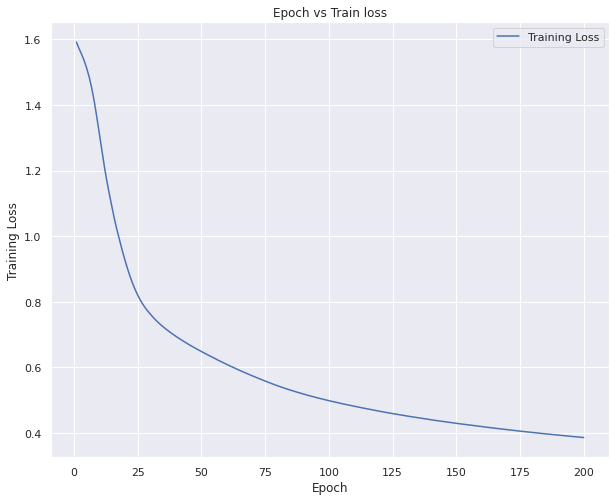

In [123]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_loss',data=history_df4)
plt.title("Epoch vs Train loss")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

### Epoch vs Val loss

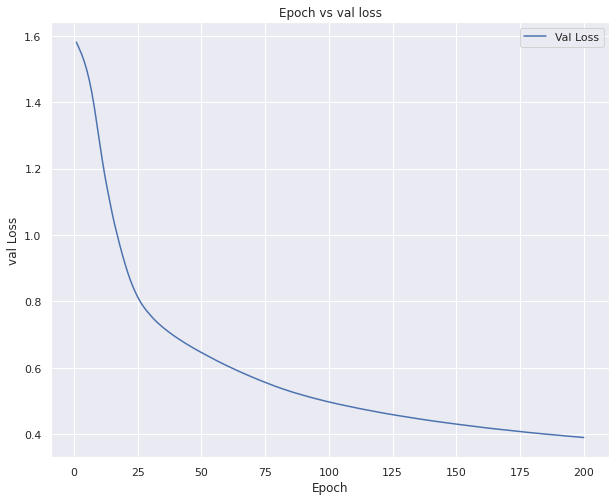

In [124]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_loss',data=history_df4)
plt.title("Epoch vs val loss")

plt.xlabel("Epoch")
plt.ylabel("val Loss")
plt.legend(["Val Loss"])
plt.show()

### Epoch vs Train accuracy 

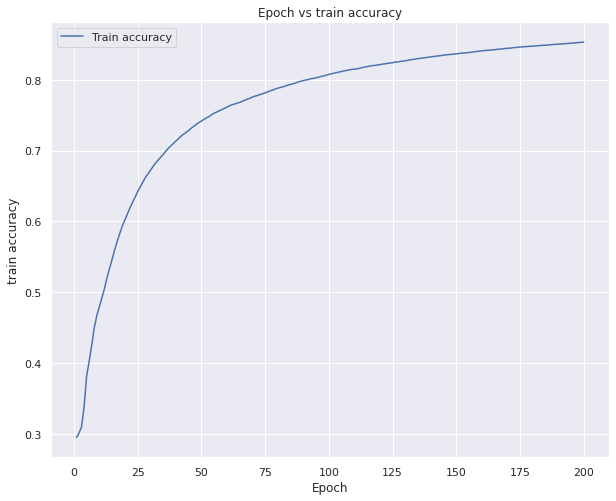

In [125]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df4)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

### Epoch vs Val accuracy

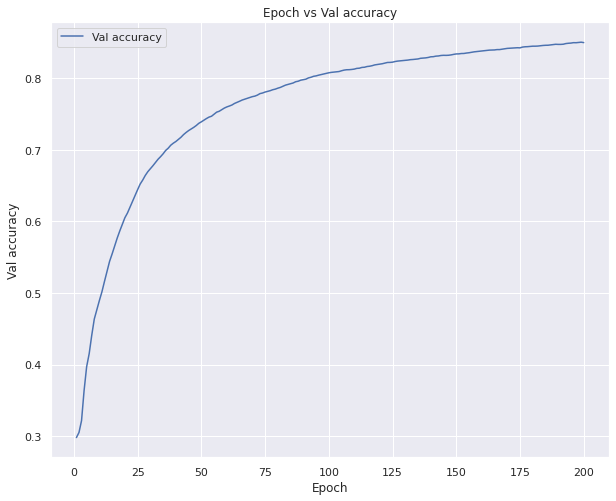

In [126]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df4)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

### Train accuracy vs Train loss

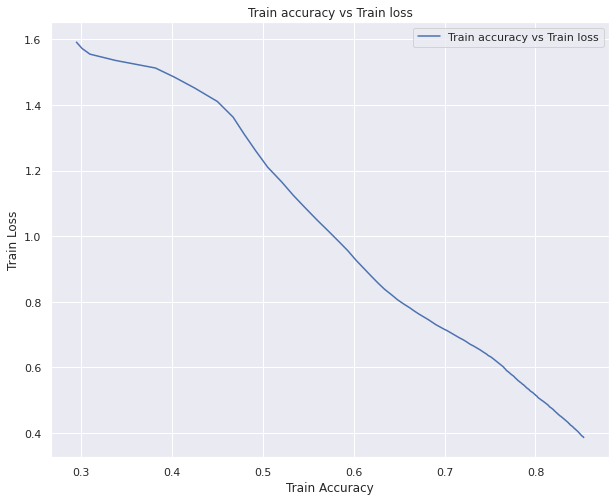

In [127]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='train_acc',y='train_loss',data=history_df4)
plt.title("Train accuracy vs Train loss")

plt.xlabel("Train Accuracy")
plt.ylabel("Train Loss")
plt.legend(["Train accuracy vs Train loss"])
plt.show()

### Val accuracy vs Val loss

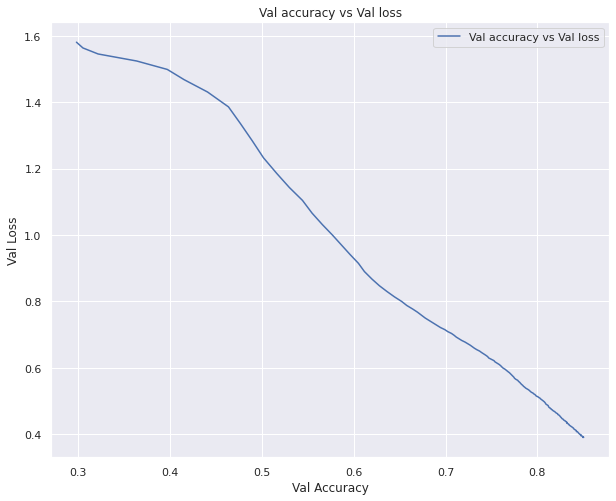

In [128]:
import seaborn as sns;
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='val_acc',y='val_loss',data=history_df4)
plt.title("Val accuracy vs Val loss")

plt.xlabel("Val Accuracy")
plt.ylabel("Val Loss")
plt.legend(["Val accuracy vs Val loss"])
plt.show()

# Final data prediction

In [129]:
test_data


,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


# -- Reshaping the final test data--

In [130]:
# for test data
#Storing Pixel array in form length width and channel in df_x_test
df_x_test = test_data.iloc[:,1:].values.reshape(len(test_data),28,28,1)

In [131]:
df_x_test.shape

(10000, 28, 28, 1)

In [132]:
df_x_test

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


# --Normalizing the test data--

In [133]:
df_x_test=df_x_test.astype('float32')
#rescaling it between 0 to 1
df_x_test /=255


In [134]:
target_classes1 = model.predict(df_x_test,verbose=1)

10000/10000 [==============================] - 0s 41us/step


In [135]:
target_classes1

array([[2.40815695e-13, 1.83394568e-05, 4.62714292e-04, 4.26429152e-01,
        5.73089778e-01],
       [3.61260357e-15, 2.27246488e-07, 4.71453229e-03, 7.23948851e-02,
        9.22890306e-01],
       [7.69096911e-01, 2.09686860e-01, 2.09501255e-02, 1.10453970e-04,
        1.55578455e-04],
       ...,
       [5.06151832e-09, 4.48933279e-04, 5.27084351e-01, 3.47795367e-01,
        1.24671295e-01],
       [3.23874131e-03, 1.34139597e-01, 8.38888824e-01, 1.81821156e-02,
        5.55083249e-03],
       [5.63767755e-10, 2.93195510e-04, 4.81077582e-01, 5.13074040e-01,
        5.55511750e-03]], dtype=float32)

In [136]:
target_classes1=np.argmax(target_classes1,axis=1)

In [137]:
target_classes1

array([4, 4, 0, ..., 2, 2, 3])

In [138]:
target_classes2 = model.predict_classes(df_x_test,verbose=1)
target_classes2

10000/10000 [==============================] - 0s 41us/step


array([4, 4, 0, ..., 2, 2, 3])

In [139]:
target_classes2=pd.DataFrame(target_classes2)

In [140]:
target_classes2=pd.DataFrame.reset_index(target_classes2)
target_classes2.columns=['Id','Label']

In [141]:
target_classes2

,Id,Label
0,0,4
1,1,4
2,2,0
3,3,1
4,4,1
...,...,...
9995,9995,3
9996,9996,1
9997,9997,2
9998,9998,2


In [142]:
filename = 'submission_lenet5_3.csv'
target_classes2.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission_lenet5_3.csv
